In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def Extract_Freq(file,num_atoms):
    
    # open file and read each line
    with open(file) as f:
        lines = f.readlines()

    # setting flag and index to 0
    flag = 0
    index = 0

    # Loop through the file line by line
    for line in lines:  
        index += 1 

        # checking string is present in line or not
        if 'IR SPECTRUM' in line:

          flag = 1
          break # once string is found stop looking

    # get all frequency data
    Freq_temp = [] 
    for i in range(index+4,index+(3*num_atoms)-2): # loop over 3N-6 configs
        Freq_temp.append(lines[i].split())

    Freq = []
    Inte = []

    # Store Frequency and Intensity Data
    for i in Freq_temp:
        Freq.append(float(i[1]))
        Inte.append(float(i[2]))
        
    return Freq, Inte, lines

def Lor_LS(Freq,Inte,span,spread):
    
    mode = np.zeros(span)
    
    for I,F in enumerate(Freq):
        X = []
        m = []
        
        for x in range(0,span):
            X.append(x)
            m.append(Int[I]*(1/np.pi*spread)*spread**2/(((x-F)**2)+spread**2))
            
        mode += m
        
    return X,mode
    

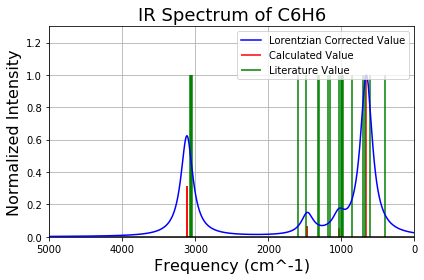

In [7]:
n = 12 # number of atoms
file = 'freq.orca'

Freq, Int,lines = Extract_Freq(file,n)
span = 5000
spread = 100
F,I = Lor_LS(Freq,Int,span,spread)
        
values=[3062.0,992.0,1326.0,673.0,3068.0,1010.0,995.0,703.0,1310.0,1150.0,849.0,3063.0,1486.0,1038.0,3047.0,1596.0,1178.0,606.0,975.0,410.0]
        
plt.plot(F,I/max(I),color='blue', label = 'Lorentzian Corrected Value')
plt.vlines(Freq,np.linspace(0,0,len(Int)),np.array(Int)/max(Int),color='red', label='Calculated Value')
plt.vlines(values,0,1,color='green', label='Literature Value')
plt.hlines(0,0,5000)
plt.xlabel("Frequency (cm^-1)", size=16)
plt.ylabel("Normalized Intensity", size=16)
plt.title("IR Spectrum of C6H6", size=18)
plt.xlim(5000,0)
plt.ylim(0,1.3)
plt.legend(loc='upper right')
plt.grid()

plt.tight_layout()
plt.savefig('./IR_C6H6.pdf')
plt.show()


